In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
%matplotlib inline
from sklearn import datasets

# Logistic regression example
Logistic regression is an learning algorithm that only suitable for categorizing the data
Given a set of inputs X, we want to assign them to one of two possible categories (0 or 1). Logistic regression models the probability that each input belongs to a particular category.

# Sigmoid function

A function takes inputs and returns outputs. To generate probabilities, logistic regression uses a function that gives outputs between 0 and 1 for all values of X. There are many functions that meet this description, but the used in this case is the logistic function. From here we will refer to it as sigmoid.

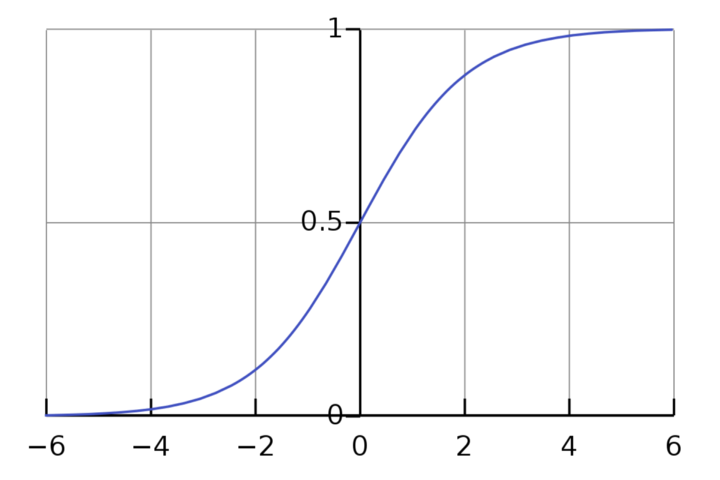

In [27]:
Image(filename='./images/sigmoid.png', width=500) 


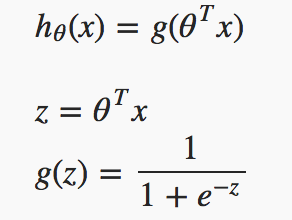

In [83]:
Image(filename='./images/operation.png', width=500) 


# Loss function
Functions have parameters/weights (represented by theta in our notation) and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function, defined as:

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$


In [2]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-1*z))
    return s

# dataset

In [28]:
iris = datasets.load_iris()
print(iris.data.shape)
X = iris.data[:, :2]
y = (iris.target != 0) * 1
lr = 0.001
num_iter = 100000
iris_data = pd.DataFrame(data = iris.data[:,0:2], columns = ["Sepal Length (cm)", "Sepal Width (cm)"])
iris_target = pd.DataFrame(data = (iris.target != 0) * 1, columns = ["Target"])
iris_df = pd.concat([iris_data, iris_target], axis = 1)
iris_df.head(10)

(150, 4)


,Sepal Length (cm),Sepal Width (cm),Target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


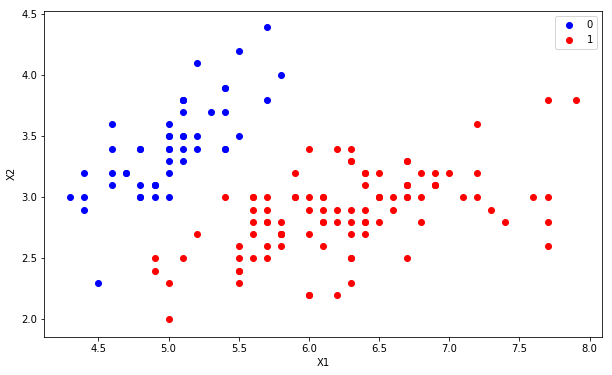

In [73]:
Image(filename='./images/iris.png', width=500) 


#  Initializing parameters


In [29]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [5]:
X = add_intercept(X)


In [30]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

C:\Users\solai\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


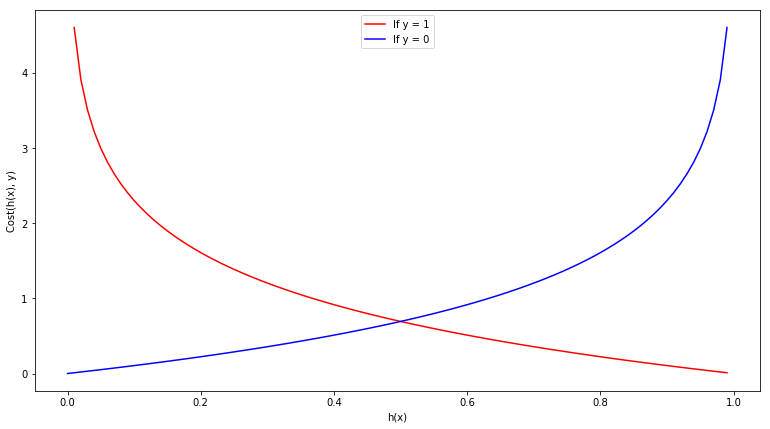

In [31]:
# Graphically, the Cost function looks like so:
nums = np.arange(0, 1, step=.01)

fig, ax = plt.subplots(figsize=(13,7))


ax.plot(nums, np.multiply(1, -np.log(nums)), c='r', label='If y = 1')
ax.plot(nums, np.multiply(1, -np.log(1-nums)), c='b', label='If y = 0')
ax.set_xlabel('h(x)')
ax.set_ylabel('Cost(h(x), y)')
ax.legend(loc='upper center')

# When y=1,
$$\text{as } h_{\theta}(x)\to1,\ \text{Cost}(h_{\theta}(x), y)\to0$$
$$\text{as } h_{\theta}(x)\to0,\ \text{Cost}(h_{\theta}(x), y)\to\infty$$

# When y=0,
$$\text{as }\ h_{\theta}(x)\to1,\ \text{Cost}(h_{\theta}(x), y)\to\infty$$
$$\text{as }\ h_{\theta}(x)\to0,\ \text{Cost}(h_{\theta}(x), y)\to0$$

In [32]:
def gradient_descent(X, y):   
    # weights initialization
    theta = np.zeros(X.shape[1])
    descent = dict()
        
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= lr * gradient
            
        z = np.dot(X,theta)
        h = sigmoid(z)
        loss = cost(h, y)
                
        if i % 10000 == 0:
            # Add something here to capture the 10 costs so that I can plot it against # of iterations
            descent[i] = loss
            print(f'cost: {loss} \t', f'weights: {theta} \t')
    return descent

# 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

#  Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.




In [33]:
descent_dict = gradient_descent(X,y)

cost: 0.6914360617472931 	 weights: [0.001253   0.00038767] 	
cost: 0.321411287787002 	 weights: [ 0.90565454 -1.42911368] 	
cost: 0.22329113279142773 	 weights: [ 1.38164842 -2.28911142] 	
cost: 0.17627137378441474 	 weights: [ 1.71503275 -2.88534351] 	
cost: 0.1486566425817547 	 weights: [ 1.97187968 -3.34247453] 	
cost: 0.130404234708048 	 weights: [ 2.18132335 -3.71414999] 	
cost: 0.11738789064806579 	 weights: [ 2.35853697 -4.02800283] 	
cost: 0.10760371306188371 	 weights: [ 2.51239198 -4.30008674] 	
cost: 0.09996010481534849 	 weights: [ 2.64851905 -4.54054767] 	
cost: 0.09381066169172807 	 weights: [ 2.77071576 -4.75620726] 	


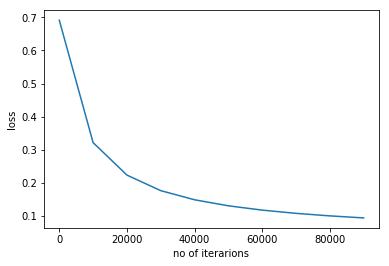

In [34]:
iteration=descent_dict.keys()
cost=descent_dict.values()
plt.xlabel("no of iterarions")
plt.ylabel("loss")
plt.plot(iteration,cost)

# 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.


In [11]:
# Just copy and pasted it from above
final_weights = np.array([-0.76166695, 2.85237561, -4.65674792])

In [35]:
def predict_prob(X, theta):
    final_pred = sigmoid(np.dot(X, theta))
    return final_pred.round()

In [36]:
predict_prob(X,final_weights)


ValueError: shapes (150,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)